# Restaurant Revenue Prediction

TFI has provided a dataset with 137 restaurants in the training set, and a test set of 100000 restaurants. The data columns include the open date, location, city type, and three categories of obfuscated data: Demographic data, Real estate data, and Commercial data. The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. 

Id : Restaurant id. 

Open Date : opening date for a restaurant

City : City that the restaurant is in. Note that there are unicode in the names. 

City Group: Type of the city. Big cities, or Other. 

Type: Type of the restaurant. FC: Food Court, IL: Inline, DT: Drive Thru, MB: Mobile

P1, P2 - P37 (revenue of the restaurant in a given year): There are three categories of these obfuscated data. Demographic data are gathered from third party providers with GIS systems. These include population in any given area, age and gender distribution, development scales. Real estate data mainly relate to the m2 of the location, front facade of the location, car park availability. Commercial data mainly include the existence of points of interest including schools, banks, other QSR operators.

Revenue: The revenue column indicates a (transformed) revenue of the restaurant in a given year and is the target of predictive analysis. Please note that the values are transformed so they don't mean real dollar values. 


In [1]:
#Importing all libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest

warnings.filterwarnings("ignore")



In [2]:
#Reading the files
trainData = pd.read_csv("C:\\Users\\ICC23\\Downloads\\restaurant-revenue-prediction\\train.csv")
testData = pd.read_csv("C:\\Users\\ICC23\\Downloads\\restaurant-revenue-prediction\\test.csv")


# Data Exploration

In [3]:
trainData.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,revenue
count,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,...,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,137.000000,1.370000e+02
mean,68.000000,4.014599,4.408759,4.317518,4.372263,2.007299,3.357664,5.423358,5.153285,5.445255,...,3.135036,2.729927,1.941606,2.525547,1.138686,2.489051,2.029197,2.211679,1.116788,4.453533e+06
std,39.692569,2.910391,1.514900,1.032337,1.016462,1.209620,2.134235,2.296809,1.858567,1.834793,...,1.680887,5.536647,3.512093,5.230117,1.698540,5.165093,3.436272,4.168211,1.790768,2.576072e+06
min,0.000000,1.000000,1.000000,0.000000,3.000000,1.000000,1.000000,1.000000,1.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.149870e+06
25%,34.000000,2.000000,4.000000,4.000000,4.000000,1.000000,2.000000,5.000000,4.000000,4.000000,...,2.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.999068e+06
50%,68.000000,3.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,5.000000,5.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.939804e+06
75%,102.000000,4.000000,5.000000,5.000000,5.000000,2.000000,4.000000,5.000000,5.000000,5.000000,...,3.000000,4.000000,3.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000,5.166635e+06
max,136.000000,12.000000,7.500000,7.500000,7.500000,8.000000,10.000000,10.000000,10.000000,10.000000,...,7.500000,25.000000,15.000000,25.000000,6.000000,24.000000,15.000000,20.000000,8.000000,1.969694e+07


In [4]:
testData.describe()

,Id,P1,P2,P3,P4,P5,P6,P7,P8,P9,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.00000,100000.000000,...,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,4.088030,4.428085,4.215325,4.396025,1.989590,2.881900,5.30051,4.93100,5.251380,...,3.233785,3.084000,2.083300,1.193330,1.942640,0.987430,2.108670,1.832830,1.968890,0.973500
std,28867.657797,2.812963,1.428865,0.842161,1.035827,1.065314,1.531429,2.17858,1.71849,1.702632,...,2.136694,1.783927,4.309479,2.307944,3.971298,1.534808,4.685414,3.228769,3.805773,1.677267
min,0.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.00000,1.00000,4.000000,...,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24999.750000,2.000000,3.750000,4.000000,4.000000,1.000000,2.000000,5.00000,4.00000,4.000000,...,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,49999.500000,3.000000,5.000000,4.000000,4.000000,2.000000,2.000000,5.00000,5.00000,5.000000,...,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,74999.250000,4.000000,5.000000,4.000000,5.000000,2.000000,4.000000,5.00000,5.00000,5.000000,...,4.000000,3.000000,3.000000,1.000000,3.000000,2.000000,3.000000,4.000000,3.000000,2.000000
max,99999.000000,15.000000,7.500000,6.000000,7.500000,6.000000,10.000000,10.00000,10.00000,10.000000,...,12.500000,10.000000,25.000000,15.000000,25.000000,6.000000,30.000000,15.000000,20.000000,8.000000


In [5]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137 entries, 0 to 136
Data columns (total 43 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Id          137 non-null    int64  
 1   Open Date   137 non-null    object 
 2   City        137 non-null    object 
 3   City Group  137 non-null    object 
 4   Type        137 non-null    object 
 5   P1          137 non-null    int64  
 6   P2          137 non-null    float64
 7   P3          137 non-null    float64
 8   P4          137 non-null    float64
 9   P5          137 non-null    int64  
 10  P6          137 non-null    int64  
 11  P7          137 non-null    int64  
 12  P8          137 non-null    int64  
 13  P9          137 non-null    int64  
 14  P10         137 non-null    int64  
 15  P11         137 non-null    int64  
 16  P12         137 non-null    int64  
 17  P13         137 non-null    float64
 18  P14         137 non-null    int64  
 19  P15         137 non-null    i

In [6]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 42 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Id          100000 non-null  int64  
 1   Open Date   100000 non-null  object 
 2   City        100000 non-null  object 
 3   City Group  100000 non-null  object 
 4   Type        100000 non-null  object 
 5   P1          100000 non-null  int64  
 6   P2          100000 non-null  float64
 7   P3          100000 non-null  float64
 8   P4          100000 non-null  float64
 9   P5          100000 non-null  int64  
 10  P6          100000 non-null  int64  
 11  P7          100000 non-null  int64  
 12  P8          100000 non-null  int64  
 13  P9          100000 non-null  int64  
 14  P10         100000 non-null  int64  
 15  P11         100000 non-null  int64  
 16  P12         100000 non-null  int64  
 17  P13         100000 non-null  float64
 18  P14         100000 non-null  int64  
 19  P15

In [7]:
# To check which city has maximum number of restaurants
trainData["City"].value_counts()

İstanbul          50
Ankara            19
İzmir              9
Bursa              5
Samsun             5
Sakarya            4
Antalya            4
Eskişehir          3
Tekirdağ           3
Diyarbakır         3
Adana              3
Kayseri            3
Muğla              2
Trabzon            2
Konya              2
Aydın              2
Tokat              1
Kastamonu          1
Amasya             1
Kütahya            1
Kocaeli            1
Gaziantep          1
Afyonkarahisar     1
Kırklareli         1
Elazığ             1
Balıkesir          1
Osmaniye           1
Isparta            1
Şanlıurfa          1
Karabük            1
Edirne             1
Uşak               1
Bolu               1
Denizli            1
Name: City, dtype: int64

In [8]:
# To check which city has maximum number of restaurants
testData["City"].value_counts()

İstanbul          34087
Ankara             8720
İzmir              6465
Antalya            5911
Kocaeli            4364
Mersin             2735
Adana              2514
Balıkesir          2463
Bursa              2441
Muğla              1823
Aydın              1617
Tekirdağ           1577
Konya              1576
Gaziantep          1487
Edirne             1230
Manisa             1227
Çanakkale           965
Denizli             964
Diyarbakır          954
Hatay               951
Zonguldak           926
Eskişehir           900
Trabzon             660
Aksaray             650
Bolu                631
Yalova              630
Kırıkkale           622
Malatya             616
Mardin              610
Şanlıurfa           609
Sakarya             604
Batman              604
Rize                345
Artvin              344
Bilecik             339
Afyonkarahisar      331
Nevşehir            328
Sivas               326
Samsun              324
Kayseri             323
Kırşehir            319
Erzincan        

According to data maximum resturants are in Istanbul followed by Ankara and Izmir

In [9]:
#Numerical columns
num_col = trainData.select_dtypes(exclude=['object']).columns

#Categorical columns
cat_col = trainData.select_dtypes(include=['object']).columns

In [10]:
num_col

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37', 'revenue'],
      dtype='object')

In [11]:
cat_col

Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')

In [12]:
#Numerical columns
num_col1 = testData.select_dtypes(exclude=['object']).columns

#Categorical columns
cat_col1 = testData.select_dtypes(include=['object']).columns

In [13]:
num_col1

Index(['Id', 'P1', 'P2', 'P3', 'P4', 'P5', 'P6', 'P7', 'P8', 'P9', 'P10',
       'P11', 'P12', 'P13', 'P14', 'P15', 'P16', 'P17', 'P18', 'P19', 'P20',
       'P21', 'P22', 'P23', 'P24', 'P25', 'P26', 'P27', 'P28', 'P29', 'P30',
       'P31', 'P32', 'P33', 'P34', 'P35', 'P36', 'P37'],
      dtype='object')

In [14]:
cat_col1

Index(['Open Date', 'City', 'City Group', 'Type'], dtype='object')

In [15]:
testData.head()

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P28,P29,P30,P31,P32,P33,P34,P35,P36,P37
0,0,01/22/2011,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,2.0,3.0,0,0,0,0,0,0,0,0
1,1,03/18/2011,Konya,Other,IL,3,4.0,4.0,4.0,2,...,1.0,3.0,0,0,0,0,0,0,0,0
2,2,10/30/2013,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,2.0,3.0,0,0,0,0,0,0,0,0
3,3,05/06/2013,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,2.0,3.0,0,4,0,0,0,0,0,0
4,4,07/31/2013,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,5.0,3.0,0,0,0,0,0,0,0,0


In [16]:
print("Train :",trainData.shape)
print("Test :",testData.shape)

Train : (137, 43)
Test : (100000, 42)


# Feature Extarction & Visualization

In [17]:
#Get column with null values
trainData.columns[trainData.isna().any()].tolist()

[]

In [18]:
#Get column with null values
testData.columns[testData.isna().any()].tolist()

[]

In [19]:
trainData['Open Date'] = pd.to_datetime(trainData['Open Date'], format= '%m/%d/%Y')
trainData['OpenDays']=""

dateLastTrain = pd.DataFrame({'Date':np.repeat(['01/01/2020'],[len(trainData)]) })
dateLastTrain['Date'] = pd.to_datetime(dateLastTrain['Date'], format= '%m/%d/%Y' )
dateLastTrain.head()

trainData['OpenDays'] = dateLastTrain['Date'] - trainData['Open Date']
trainData['OpenDays'] = trainData['OpenDays'].astype('timedelta64[D]').astype(int)

In [20]:
trainData.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P30,P31,P32,P33,P34,P35,P36,P37,revenue,OpenDays
0,0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,4.0,2,...,5,3,4,5,5,4,3,4,5653753.0,7473
1,1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,4.0,1,...,0,0,0,0,0,0,0,0,6923131.0,4339
2,2,2013-03-09,Diyarbakır,Other,IL,2,4.0,2.0,5.0,2,...,0,0,0,0,0,0,0,0,2055379.0,2489
3,3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,6.0,4,...,25,12,10,6,18,12,12,6,2675511.0,2890
4,4,2009-05-09,Gaziantep,Other,IL,3,4.0,3.0,4.0,2,...,5,1,3,2,3,4,3,3,4316715.0,3889


In [21]:
testData['Open Date'] = pd.to_datetime(testData['Open Date'], format= '%m/%d/%Y')
testData['OpenDays']=""

dateLastTest = pd.DataFrame({'Date':np.repeat(['01/01/2020'],[len(testData)]) })
dateLastTest['Date'] = pd.to_datetime(dateLastTest['Date'], format= '%m/%d/%Y' )
dateLastTest.head()

testData['OpenDays'] = dateLastTest['Date'] - testData['Open Date']
testData['OpenDays'] = testData['OpenDays'].astype('timedelta64[D]').astype(int)

In [22]:
testData.head(5)

,Id,Open Date,City,City Group,Type,P1,P2,P3,P4,P5,...,P29,P30,P31,P32,P33,P34,P35,P36,P37,OpenDays
0,0,2011-01-22,Niğde,Other,FC,1,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,3266
1,1,2011-03-18,Konya,Other,IL,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,3211
2,2,2013-10-30,Ankara,Big Cities,FC,3,4.0,4.0,4.0,2,...,3.0,0,0,0,0,0,0,0,0,2254
3,3,2013-05-06,Kocaeli,Other,IL,2,4.0,4.0,4.0,2,...,3.0,0,4,0,0,0,0,0,0,2431
4,4,2013-07-31,Afyonkarahisar,Other,FC,2,4.0,4.0,4.0,1,...,3.0,0,0,0,0,0,0,0,0,2345


# Target variable distribution

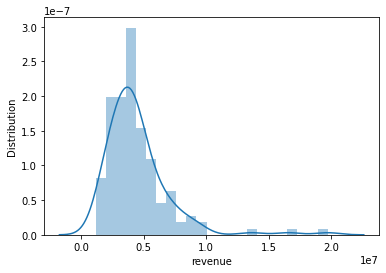

In [23]:
sns.distplot(trainData['revenue'], norm_hist=False, kde=True).set(xlabel='revenue', ylabel='Distribution');

Distribution of revenue is right skewed (positively skewed)

# Numerical column distribution

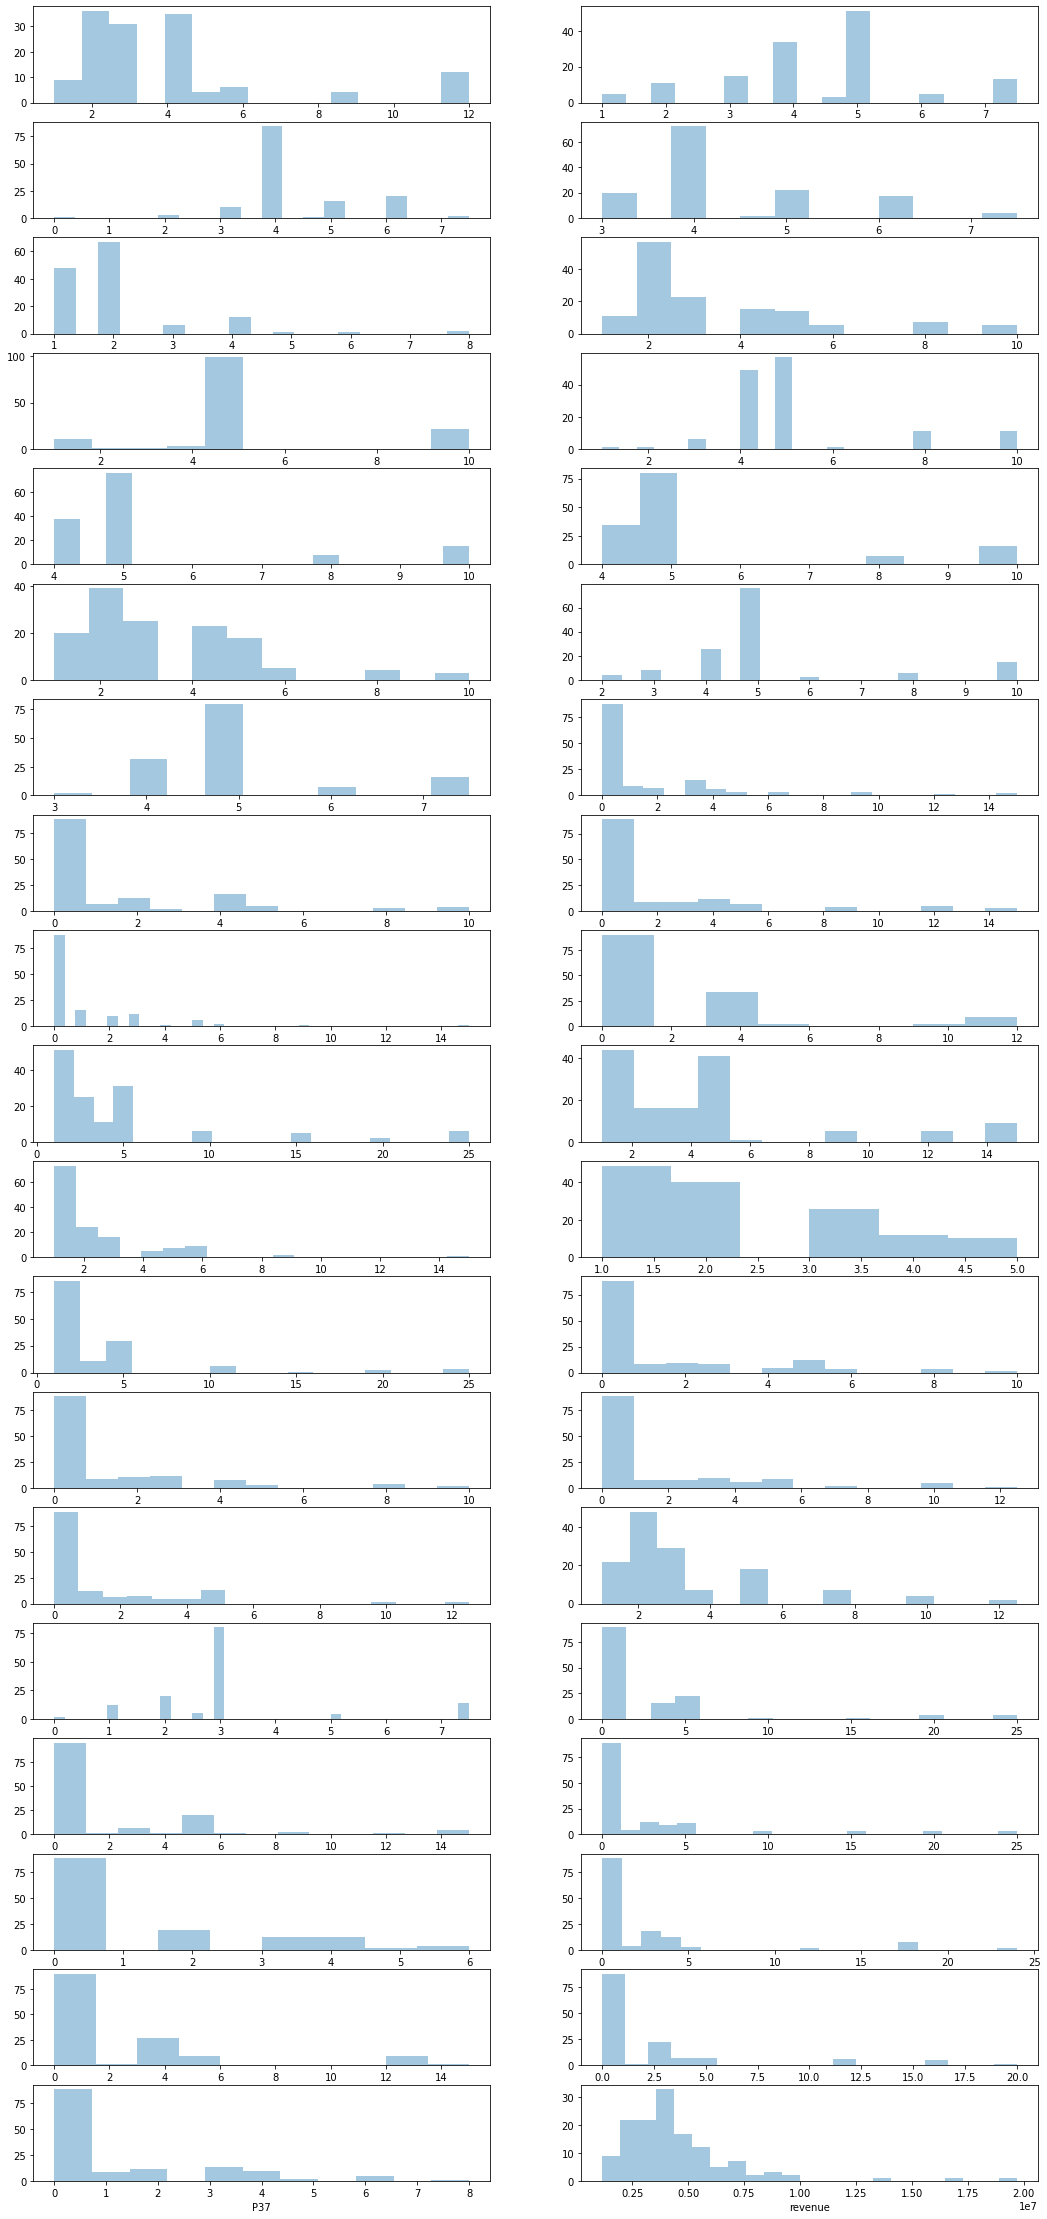

In [24]:
fig, axes = plt.subplots(nrows=19,ncols=2, figsize=(18,40))
axes = axes.flatten()
for index,col in enumerate(num_col[1:]):
    sns.distplot(trainData[col],ax=axes[index],kde_kws={'cumulative':True, 'bw':1.5},kde=False);

Distribution of numerical column is also right skewed (positively skewed)

In [25]:
# Maximum 
trainData['revenue'].max()

19696939.0

# Comparing the revenues of big cities and other cities


Median Revenue of Big cities: 4234908.0
Median Revenue of Other cities: 3745135.0


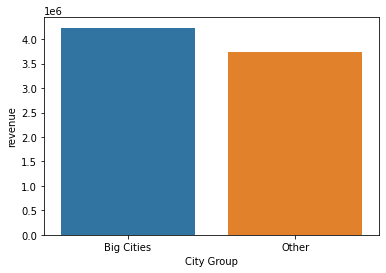

In [26]:
cityPerc = trainData[['City Group', 'revenue']].groupby(['City Group'],as_index=False).median()
sns.barplot(x= 'City Group', y='revenue', data=cityPerc)

bc_median = trainData[trainData['City Group'] == 'Big Cities']['revenue'].median()
oc_median = trainData[trainData['City Group'] == 'Other']['revenue'].median()
print("Median Revenue of Big cities:", bc_median)
print("Median Revenue of Other cities:", oc_median)

# Sorting the cities by revenue 

<AxesSubplot:xlabel='revenue', ylabel='City'>

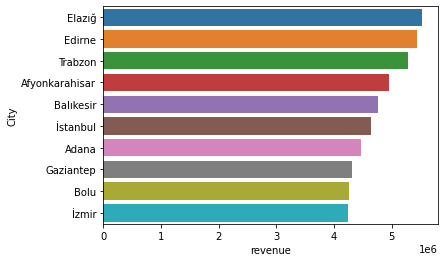

In [27]:
cityPerc = trainData[['City','revenue']].groupby(['City'],as_index=False).median()
newDF = cityPerc.sort_values(['revenue'],ascending= False)
sns.barplot(x='revenue', y='City', data=newDF.head(10))


Elazig, Edirne and Trabzon cities generate maximum revenue


<AxesSubplot:xlabel='revenue', ylabel='City'>

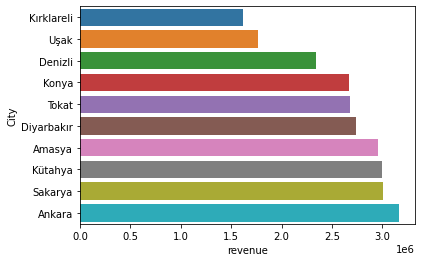

In [28]:
cityPerc = trainData[['City','revenue']].groupby(['City'],as_index=False).median()
newDF = cityPerc.sort_values(['revenue'],ascending= True)
sns.barplot(x='revenue', y='City', data=newDF.head(10))

Kirklareli, Usak and Denizil cities generate minimun revenue

# Which restaurant type earns more

Median Revenue of the types of restaurants per annum: 
 Type
DT    3810007.0
FC    3873650.0
IL    4076087.0
Name: revenue, dtype: float64


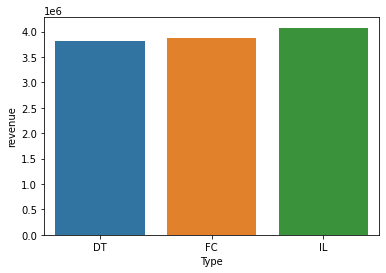

In [29]:
cityPerc = trainData[['Type','revenue']].groupby(['Type'],as_index=False).median()
sns.barplot(x='Type', y='revenue', data=cityPerc)

# Median revenue for the types of restaurants
rt_median = trainData.groupby('Type')['revenue'].aggregate(np.median)
print("Median Revenue of the types of restaurants per annum: \n", rt_median[0:])

Inline Resturant type generate more revenue than other restaurant types

# Working days of specific restaurant types

<AxesSubplot:xlabel='Type', ylabel='OpenDays'>

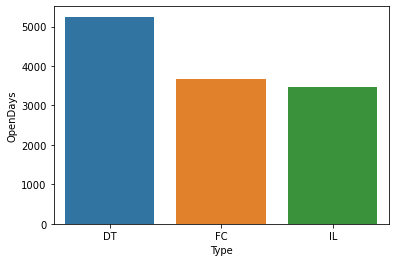

In [30]:
cityPerc = trainData[['Type','OpenDays']].groupby(['Type'],as_index=False).median()
sns.barplot(x='Type', y='OpenDays', data=cityPerc)

<AxesSubplot:xlabel='Type', ylabel='OpenDays'>

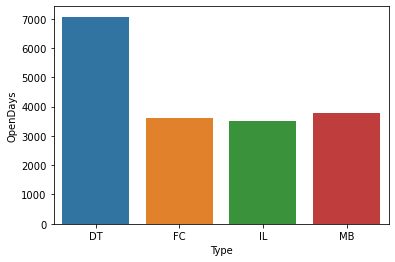

In [31]:
cityPerc = testData[['Type','OpenDays']].groupby(['Type'],as_index=False).median()
sns.barplot(x='Type', y='OpenDays', data=cityPerc)

According to the data working days of Drive Thru are maximum

# Check all the cities and provinces we are dealing with

In [32]:
trainData.City.unique()

array(['İstanbul', 'Ankara', 'Diyarbakır', 'Tokat', 'Gaziantep',
       'Afyonkarahisar', 'Edirne', 'Kocaeli', 'Bursa', 'İzmir', 'Sakarya',
       'Elazığ', 'Kayseri', 'Eskişehir', 'Şanlıurfa', 'Samsun', 'Adana',
       'Antalya', 'Kastamonu', 'Uşak', 'Muğla', 'Kırklareli', 'Konya',
       'Karabük', 'Tekirdağ', 'Denizli', 'Balıkesir', 'Aydın', 'Amasya',
       'Kütahya', 'Bolu', 'Trabzon', 'Isparta', 'Osmaniye'], dtype=object)

In [33]:
testData.City.unique()

array(['Niğde', 'Konya', 'Ankara', 'Kocaeli', 'Afyonkarahisar',
       'Eskişehir', 'Rize', 'İstanbul', 'Trabzon', 'Antalya', 'Muğla',
       'Düzce', 'Adana', 'Bursa', 'Aydın', 'Hatay', 'Denizli', 'İzmir',
       'Gaziantep', 'Samsun', 'Erzurum', 'Edirne', 'Balıkesir', 'Mersin',
       'Zonguldak', 'Malatya', 'Çanakkale', 'Kars', 'Bolu', 'Batman',
       'Bilecik', 'Giresun', 'Tekirdağ', 'Sivas', 'Kırıkkale', 'Mardin',
       'Erzincan', 'Manisa', 'Diyarbakır', 'Kahramanmaraş', 'Yalova',
       'Tanımsız', 'Sakarya', 'Kırşehir', 'Aksaray', 'Kayseri',
       'Nevşehir', 'Çorum', 'Ordu', 'Kırklareli', 'Şanlıurfa', 'Artvin',
       'Uşak', 'Kütahya', 'Siirt', 'Çankırı', 'Isparta'], dtype=object)

In [34]:
# The number of provinces and cities in our data
len(trainData.City.unique())

34

In [35]:
# The number of provinces and cities in our data
len(testData.City.unique())

57

# Types of cities 

In [36]:
trainData['City Group'].unique()

array(['Big Cities', 'Other'], dtype=object)

Big Cities    78
Other         59
Name: City Group, dtype: int64

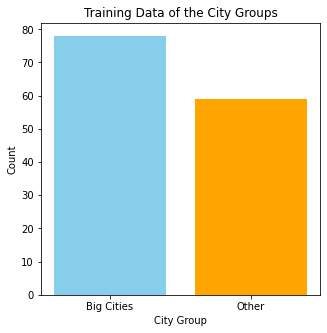

In [37]:
bigCities = len(trainData[trainData['City Group'] == "Big Cities"])
otherCount = len(trainData[trainData['City Group'] == "Other"])
dic_1 = {"Big Cities": bigCities, "Other": otherCount}

fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(dic_1.keys(), 
       dic_1.values(), 
       width=0.8, 
       color=['skyblue', 'orange'])
ax.set(xlabel= "City Group", 
       ylabel='Count',
       title='Training Data of the City Groups');
trainData['City Group'].value_counts()

According to train data maximum resturants are present in Big Cities

Other         50728
Big Cities    49272
Name: City Group, dtype: int64

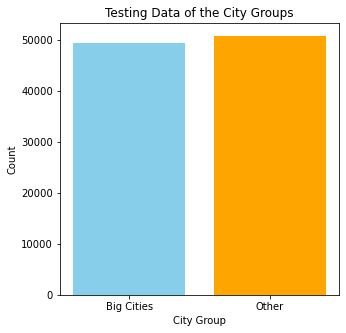

In [38]:
bigCities = len(testData[testData['City Group'] == "Big Cities"])
otherCount = len(testData[testData['City Group'] == "Other"])
dic_1 = {"Big Cities": bigCities, "Other": otherCount}

fig, ax = plt.subplots(figsize=(5, 5))
ax.bar(dic_1.keys(), 
       dic_1.values(), 
       width=0.8, 
       color=['skyblue', 'orange'])
ax.set(xlabel= "City Group", 
       ylabel='Count',
       title='Testing Data of the City Groups');
testData['City Group'].value_counts()

But according to test data maximum resturants are present in Other cities

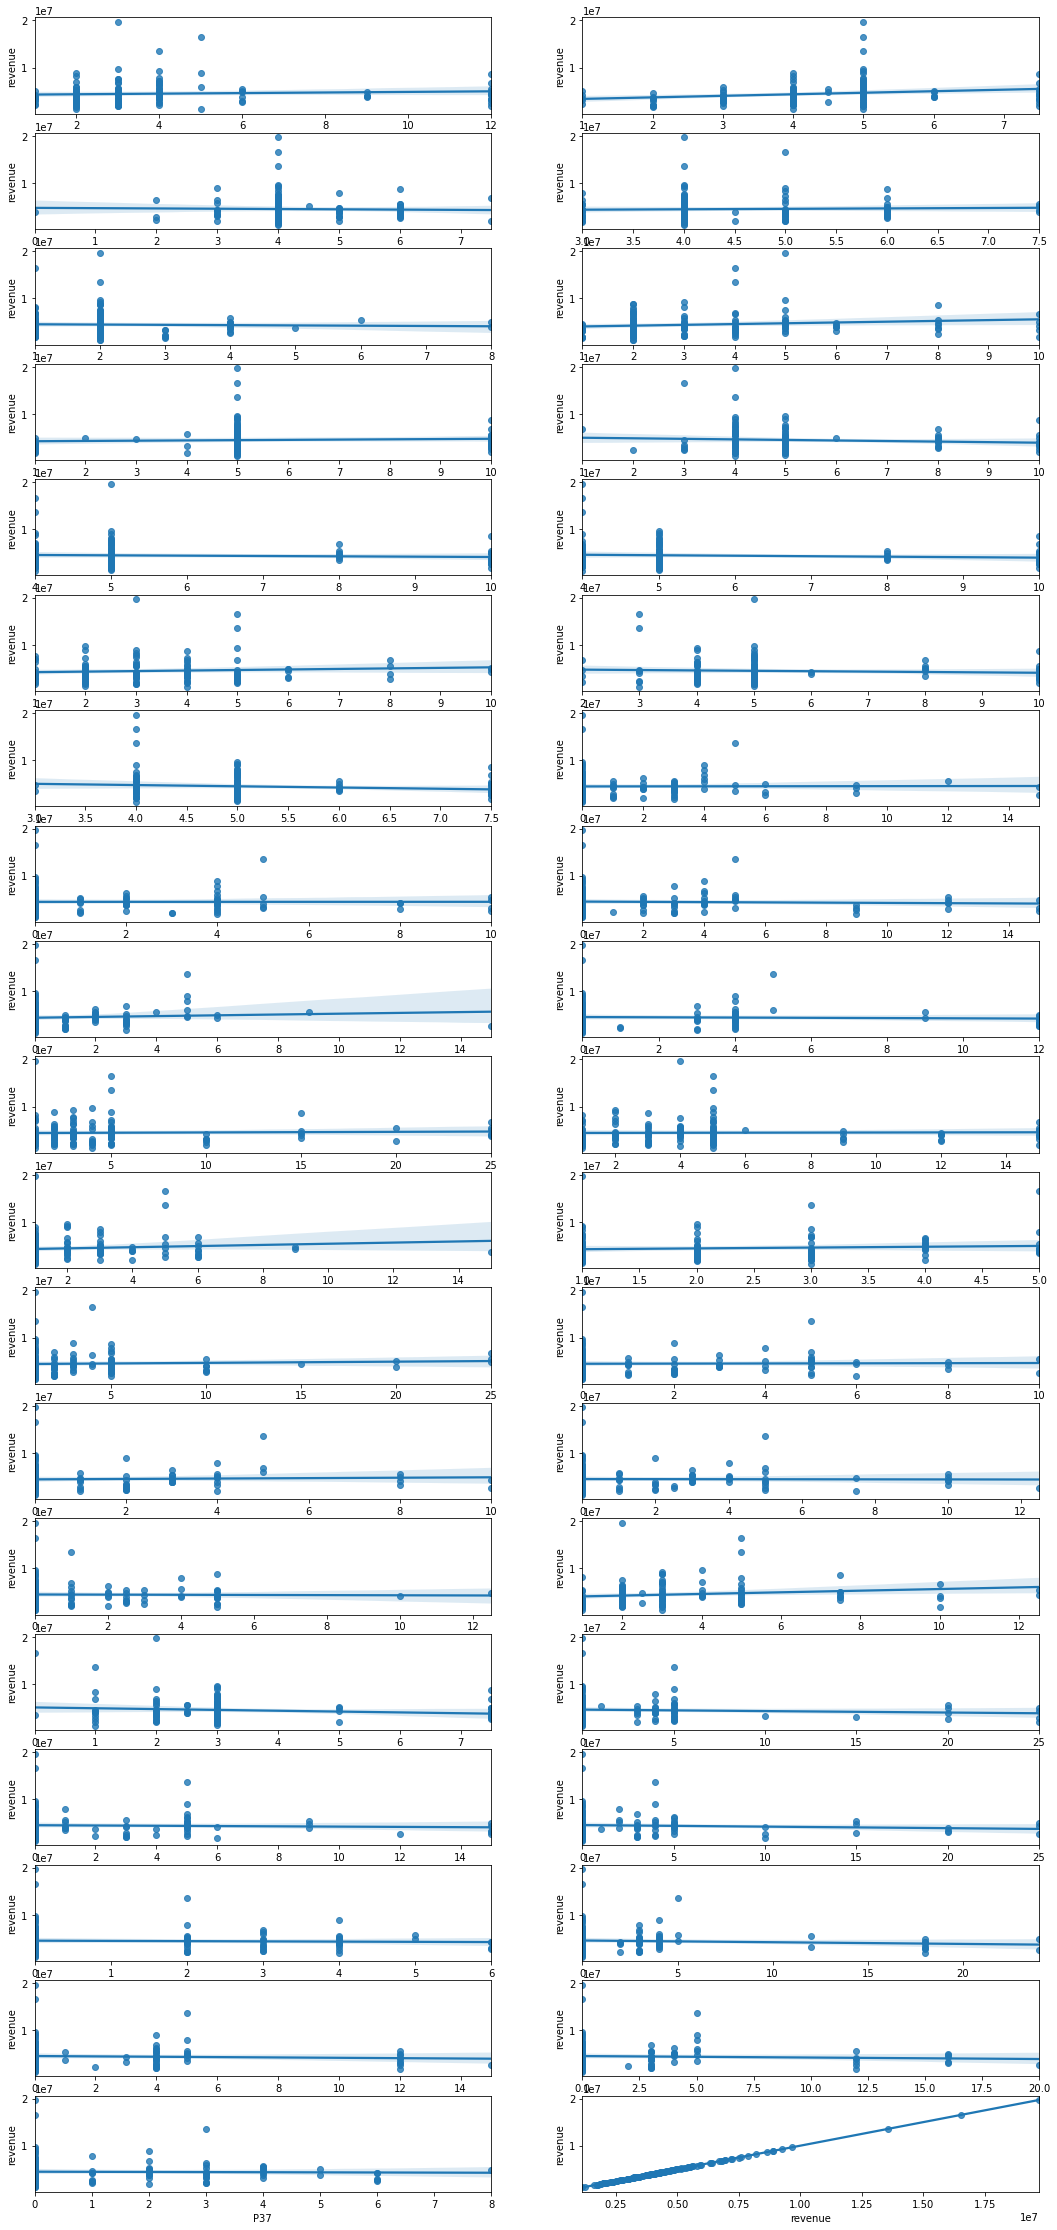

In [39]:
fig, axes = plt.subplots(nrows=19,ncols=2, figsize=(18,40))
axes = axes.flatten()
for index,col in enumerate(num_col[1:]):
    sns.regplot(x=trainData[col],y=trainData['revenue'], data = trainData, ax=axes[index]);

In [40]:
# Add seperate columns for the Open date values
trainData['Sale Day'] = trainData['Open Date'].dt.day
trainData['Sale Year'] = trainData['Open Date'].dt.year
trainData['Sale Month'] = trainData['Open Date'].dt.month

In [41]:
#converting dummy data for categorical column City Group by one hot encoding

citygroupDummyTrain = pd.get_dummies(trainData['City Group'])
trainData = trainData.join(citygroupDummyTrain)


In [42]:
trainData['Sale Year'].value_counts()

2011    25
2012    18
2009    16
2010    15
2008    14
2013    12
2006     7
2007     7
1999     4
2005     4
1998     4
2004     3
2014     2
2000     2
2002     2
1997     1
1996     1
Name: Sale Year, dtype: int64

<AxesSubplot:xlabel='Sale Year', ylabel='count'>

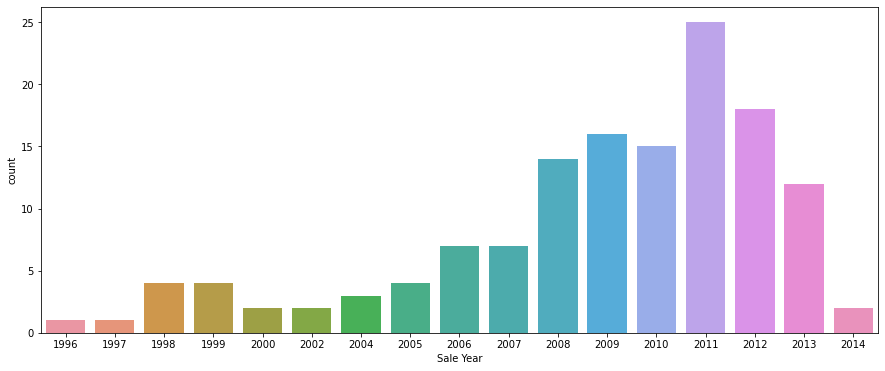

In [43]:
plt.figure(figsize=(15,6))
sns.countplot(trainData['Sale Year'])

Most of the train data lies between years 2008 to 2013 with maximum sales in year 2011 and minimum in 1996

In [44]:
trainData['Sale Month'].value_counts()

12    17
8     17
10    15
11    12
9     11
3     11
2     11
1     11
5     10
6      9
7      8
4      5
Name: Sale Month, dtype: int64

<AxesSubplot:xlabel='Sale Month', ylabel='count'>

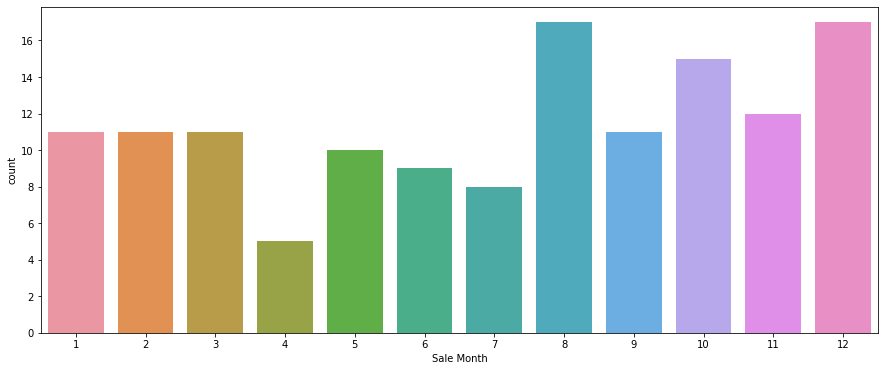

In [45]:
plt.figure(figsize=(15,6))
sns.countplot(trainData['Sale Month'])

In train data, months with maximum sales are 8th and 12th which are August and December whereas minimum sales are observed in month 4th which is April

In [46]:
# Add seperate columns for the Open date values
testData['Sale Day'] = testData['Open Date'].dt.day
testData['Sale Year'] = testData['Open Date'].dt.year
testData['Sale Month'] = testData['Open Date'].dt.month

In [47]:
#converting dummy data for categorical column City Group by one hot encoding

citygroupDummyTest = pd.get_dummies(testData['City Group'])
testData = testData.join(citygroupDummyTest)

In [48]:
testData = testData.drop('City Group', axis=1)
testData.head()

,Id,Open Date,City,Type,P1,P2,P3,P4,P5,P6,...,P34,P35,P36,P37,OpenDays,Sale Day,Sale Year,Sale Month,Big Cities,Other
0,0,2011-01-22,Niğde,FC,1,4.0,4.0,4.0,1,2,...,0,0,0,0,3266,22,2011,1,0,1
1,1,2011-03-18,Konya,IL,3,4.0,4.0,4.0,2,2,...,0,0,0,0,3211,18,2011,3,0,1
2,2,2013-10-30,Ankara,FC,3,4.0,4.0,4.0,2,2,...,0,0,0,0,2254,30,2013,10,1,0
3,3,2013-05-06,Kocaeli,IL,2,4.0,4.0,4.0,2,3,...,0,0,0,0,2431,6,2013,5,0,1
4,4,2013-07-31,Afyonkarahisar,FC,2,4.0,4.0,4.0,1,2,...,0,0,0,0,2345,31,2013,7,0,1


In [49]:
testData['Sale Year'].value_counts()

2013    14657
2012    13592
2010    11771
2009    11210
2011    11117
2007     7779
2008     6031
2006     4374
2000     3752
1998     2851
1997     2183
1999     2149
2004     1881
2005     1647
1996     1565
1995     1253
2003      920
2001      610
2014      334
2002      324
Name: Sale Year, dtype: int64

<AxesSubplot:xlabel='Sale Year', ylabel='count'>

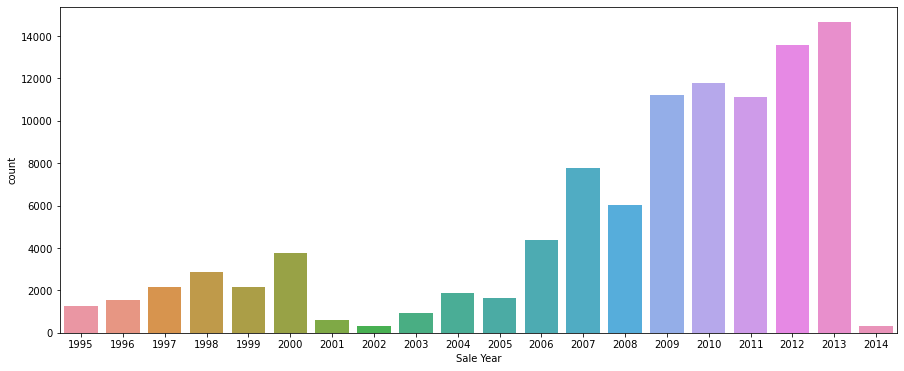

In [50]:
plt.figure(figsize=(15,6))
sns.countplot(testData['Sale Year'])

Most of the test data lies between years 2009 to 2013 with maximum sales in year 2013 and minimum in 2002


In [51]:
testData['Sale Month'].value_counts()

12    9986
11    9711
8     9253
6     9163
10    8998
9     8979
3     8873
7     8095
4     7529
5     7476
2     6298
1     5639
Name: Sale Month, dtype: int64

<AxesSubplot:xlabel='Sale Month', ylabel='count'>

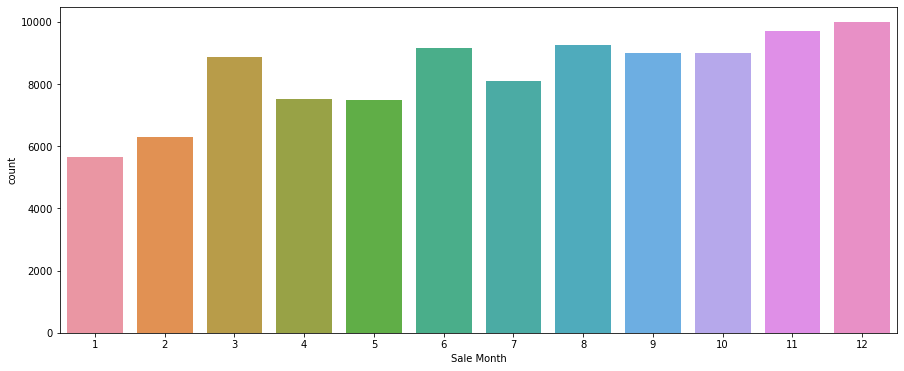

In [52]:
plt.figure(figsize=(15,6))
sns.countplot(testData['Sale Month'])

In test data, months with maximum sales are 11th and 12th which are November and December which can be due to festivals like Thanksgiving and Chistmas which are celebrated in these months whereas minimum sales are observed in month 1st which is January

In [53]:
trainData.groupby('Sale Month')['revenue'].median().sort_values(ascending=False)

Sale Month
9     4780607.0
1     4705945.0
6     4491607.0
11    4427026.0
4     4286645.0
10    4250553.0
3     3818055.0
2     3807496.0
12    3778621.0
8     3753720.0
5     3576272.0
7     3460887.5
Name: revenue, dtype: float64

<AxesSubplot:xlabel='Sale Month', ylabel='revenue'>

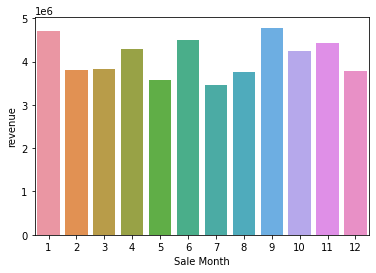

In [54]:
cityPerc = trainData[['Sale Month','revenue']].groupby(['Sale Month'],as_index=False).median()
newDF = cityPerc.sort_values(['revenue'],ascending= False)
sns.barplot(y='revenue', x='Sale Month', data=newDF.head(12))


Maximum reveue generated is in month 9th and 1st which are September and January with minimum revenue generated in month 7th which is July

In [55]:
trainData.groupby('Sale Year')['revenue'].median().sort_values(ascending=False)

Sale Year
2000    13596015.5
1999     5544514.5
2002     4991022.0
2010     4807746.0
2008     4470498.0
1997     4286645.0
1998     4245087.5
2007     4219263.0
2011     4052733.0
2009     4034304.0
2006     3956086.0
2005     3938312.5
1996     3903884.0
2012     3490635.0
2004     3445076.0
2014     2464944.5
2013     2040338.0
Name: revenue, dtype: float64

Maximum revenue generated is in year 2000 while minimum revenue generated was in year 2013 even though sales were high in that year

# Feature Selection

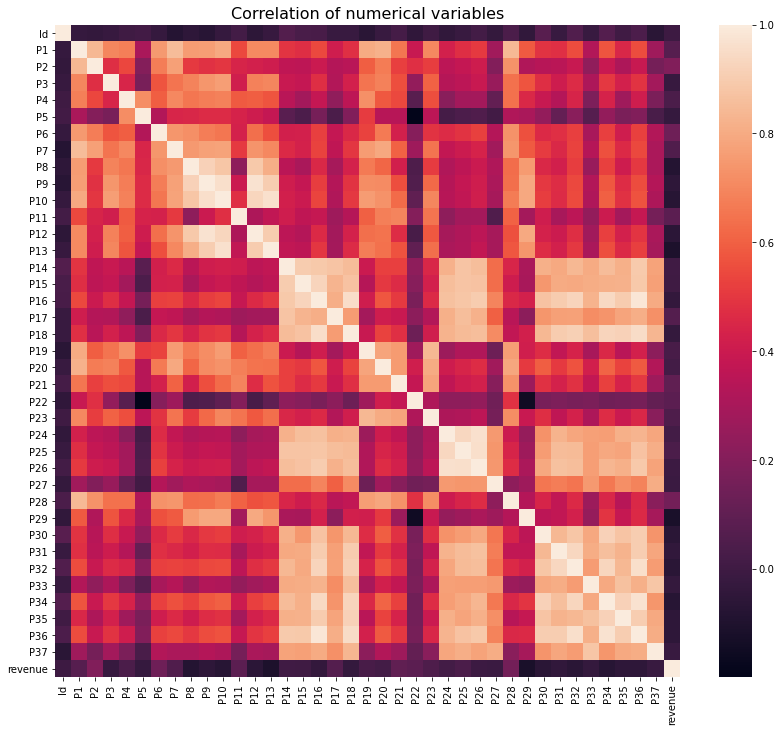

In [56]:
#Correlation Matrix

correlation = trainData[num_col].corr()
f, ax = plt.subplots(figsize = (14,12))
plt.title('Correlation of numerical variables', size=16)
sns.heatmap(correlation)
plt.show()

In [57]:
correlation['revenue'].sort_values(ascending=False)

revenue    1.000000
P2         0.191518
P28        0.155534
P6         0.139094
P21        0.097411
P11        0.084247
P22        0.083562
P1         0.070217
P17        0.067137
P7         0.051165
P23        0.045507
P25        0.036365
P4         0.035685
P19        0.027984
P24        0.014222
P20        0.014147
P14        0.006441
P15        0.000742
Id        -0.006277
P26       -0.007650
P27       -0.013680
P37       -0.019051
P3        -0.024613
P5        -0.028191
P33       -0.032426
P18       -0.034537
P16       -0.037997
P31       -0.040418
P35       -0.050156
P9        -0.050352
P36       -0.050534
P12       -0.062193
P32       -0.065857
P30       -0.066203
P34       -0.072343
P10       -0.073220
P8        -0.084215
P13       -0.105085
P29       -0.114846
Name: revenue, dtype: float64

Variables with positive relation with revenue were selected for further analysis 

In [58]:
trainData.drop(columns=['Id','P26','P27','P37','P3','P5','P33','P18','P16','P31','P35','P9','P36','P12','P32',
                           'P30','P34','P10','P8','P13','P29'], inplace=True)
trainData.head()

,Open Date,City,City Group,Type,P1,P2,P4,P6,P7,P11,...,P24,P25,P28,revenue,OpenDays,Sale Day,Sale Year,Sale Month,Big Cities,Other
0,1999-07-17,İstanbul,Big Cities,IL,4,5.0,4.0,2,5,3,...,1,1,2.0,5653753.0,7473,17,1999,7,1,0
1,2008-02-14,Ankara,Big Cities,FC,4,5.0,4.0,2,5,1,...,0,0,3.0,6923131.0,4339,14,2008,2,1,0
2,2013-03-09,Diyarbakır,Other,IL,2,4.0,5.0,3,5,2,...,0,0,1.0,2055379.0,2489,9,2013,3,0,1
3,2012-02-02,Tokat,Other,IL,6,4.5,6.0,4,10,8,...,2,2,2.5,2675511.0,2890,2,2012,2,0,1
4,2009-05-09,Gaziantep,Other,IL,3,4.0,4.0,2,5,2,...,2,3,1.0,4316715.0,3889,9,2009,5,0,1


In [59]:
testData.drop(columns=['Id','P26','P27','P37','P3','P5','P33','P18','P16','P31','P35','P9','P36','P12','P32',
                           'P30','P34','P10','P8','P13','P29'], inplace=True)
testData.head()

,Open Date,City,Type,P1,P2,P4,P6,P7,P11,P14,...,P23,P24,P25,P28,OpenDays,Sale Day,Sale Year,Sale Month,Big Cities,Other
0,2011-01-22,Niğde,FC,1,4.0,4.0,2,5,5,0,...,4,0,0,2.0,3266,22,2011,1,0,1
1,2011-03-18,Konya,IL,3,4.0,4.0,2,5,2,0,...,1,0,0,1.0,3211,18,2011,3,0,1
2,2013-10-30,Ankara,FC,3,4.0,4.0,2,5,4,0,...,5,0,0,2.0,2254,30,2013,10,1,0
3,2013-05-06,Kocaeli,IL,2,4.0,4.0,3,5,3,0,...,2,0,0,2.0,2431,6,2013,5,0,1
4,2013-07-31,Afyonkarahisar,FC,2,4.0,4.0,2,5,3,0,...,1,0,0,5.0,2345,31,2013,7,0,1


# Modeling

In [60]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn

from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
import sklearn.metrics as skm
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error ,mean_squared_error



In [61]:
# Features and Target 
X = trainData.drop(['revenue', 'Open Date', 'City', 'Type'], axis=1).values
y = trainData['revenue'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=202)


# Linear Regression

In [62]:
# Multiple Linear Regression
from sklearn.linear_model import LinearRegression
reg1 = LinearRegression().fit(X_train, y_train)
y_pred = reg1.predict(X_test)

rmse = skm.mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)


print("RMSE: {0}".format(rmse))
print("MAE: {0}".format(mae))

RMSE: 3547919.192713311
MAE: 2448631.256200881


In [63]:
reg1.score(X_train, y_train)

0.33931159867417315

# Decision Tree

In [64]:
# Single Tree Regression

reg2 = DecisionTreeRegressor(max_depth=10)
reg2.fit(X_train, y_train)
y_pred = reg2.predict(X_test)

rmse = skm.mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)


print("RMSE: {0}".format(rmse))
print("MAE: {0}".format(mae))

RMSE: 3317003.5217573703
MAE: 2234677.880952381


In [65]:
pred = reg2.predict(X_test)
pred = np.exp(pred)
scoreOfModel=reg2.score(X_train, y_train)
print("Score is calculated as: ",scoreOfModel)


Score is calculated as:  0.8788654889277948


# Random Forest

In [66]:
# Random Forest

reg3 = RandomForestRegressor(n_estimators=1000, criterion="mse")
reg3.fit(X_train, y_train)
y_pred = reg3.predict(X_test)

rmse = skm.mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)


print("RMSE: {0}".format(rmse))
print("MAE: {0}".format(mae))


RMSE: 2369531.1394449025
MAE: 1815054.349276984


In [67]:
pred = reg3.predict(X_test)
pred = np.exp(pred)
scoreOfModel=reg3.score(X_train, y_train)
print("Score is calculated as: ",scoreOfModel)

Score is calculated as:  0.7847430151304075


# XGBoost 

In [68]:
import xgboost as xgb

reg4 = xgb.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,
                 learning_rate=0.07,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=10000,
                 reg_alpha=0.75,
                 subsample=0.6,
                 seed=42)
xgbr=reg4.fit(X_train, y_train)
y_pred = reg4.predict(X_test)

rmse = skm.mean_squared_error(y_test, y_pred, squared=False)
mae=mean_absolute_error(y_test,y_pred)

              
print("RMSE: {0}".format(rmse))
print("MAE: {0}".format(mae))

RMSE: 2468149.604975037
MAE: 1913866.3422619049


In [69]:
xgbrscoreofModel=xgbr.score(X_train, y_train)
print("Score is calculated as: ",xgbrscoreofModel)

Score is calculated as:  0.8892955040763448
